<a href="https://colab.research.google.com/github/AgoMilan/Ai/blob/main/hledej_sperk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#smazání adresáře pomocí (shell)
#!rm -r /content/drive/MyDrive/Katalog/sperk

Připojí google disk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install -Uqq fastai duckduckgo_search
!pip install fastbook
!pip install fastai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os

# Cesta ke složce na Google Drive
drive_path = '/content/drive/MyDrive/Katalog'
novy_adresar='/content/drive/MyDrive/Katalog/nahrdelniky'

# Vytvoření složky, pokud neexistuje
if not os.path.exists(novy_adresar):
    os.makedirs(novy_adresar)
    print("Adresář vytvořen")

#image_path = os.path.join(drive_path, 'your_image.jpg')


Adresář vytvořen


Projekt - Hledej šperk

Prohledá a uloží do dočasného adresáře na colab, nebo na disk google

In [ ]:
## Vyhledá a uloží obr. do adresářů podle klíčových slov

from duckduckgo_search import DDGS
from fastcore.all import *
from time import sleep
from fastai.vision.utils import download_images
from fastai.vision.utils import resize_images
from fastai.vision.utils import get_image_files


def search_images_ddg(term, max_images=5):
    print(f"Searching for '{term}'")
    with DDGS() as ddgs:
        # generator which yields dicts with:
        # {'title','image','thumbnail','url','height','width','source'}
        search_results = ddgs.images(keywords=term)
        # grap number of max_images urls
        image_urls = [next(search_results).get("image") for _ in range(max_images)]
        # convert to L (functionally extended list class from fastai)
        return L(image_urls)

drive_path = '/content/drive/MyDrive/Katalog'
searches = 'ring', 'earring','necklace','pendant', 'chain', 'childrens'   # Klíčová slova pro vyhledání
path = Path('/content/drive/MyDrive/Katalog/sperk')
#path = Path('sperk') #Upravit

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(f'{o} jewel photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    #download_images(dest, urls=search_images(f'{o} sun photo'))
    #sleep(10)
    #download_images(dest, urls=search_images(f'{o} shade photo'))
    #sleep(10)
    resize_images(path/o, max_size=350, dest=path/o)

fns = get_image_files(path)



Zkontroluje stažená data a vypíše kolik je špatných

In [ ]:
from fastai.vision.utils import*
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)
print(fns)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Cesta ke "/content/drive/MyDrive/Katalogsouboru projektu
data_path = "/content/drive/MyDrive/Katalog"

# Adresář s obrázky na Google Disku
adresar_na_disku = "/content/drive/MyDrive/KatalogAA/"


Jen prohledá a napíše kolik našel (vypíše adresu prvního)

In [ ]:
sperk="pendant" # náhrdelník - necklace, přívěsek - jewelry pendant
pocet = 60
urls = search_images_ddg(sperk, max_images=pocet)
# Vypište počet skutečně nalezených obrázků (může být menší než zadaný počet, pokud není dostatek výsledků)
print(f"Skutečný počet vyhledaných obrázků pro výraz '{sperk}': {len(urls)}")

urls[0]

Načte data z adresáře, nastaví a připraví data pro učeni

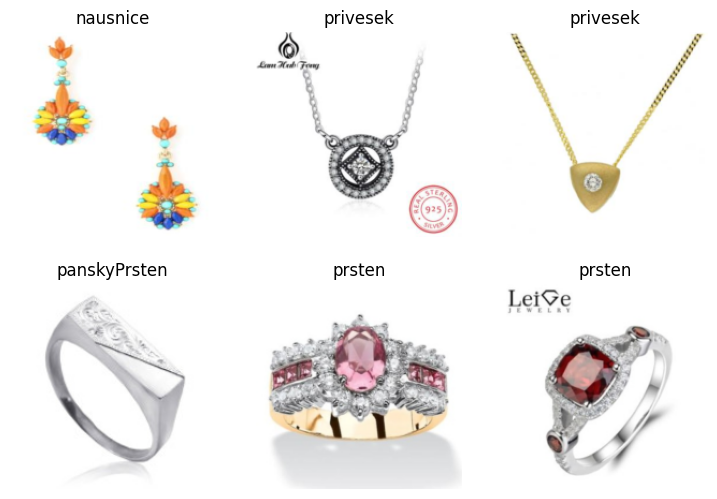

In [ ]:
## načte a připraví data na učení
from fastai.vision.all import *

path = Path('/content/drive/MyDrive/Katalog/sperk')
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),     # Druh vstupních dat "obrázek", výstup "kategorie, výstupů muže být víc"
    get_items=get_image_files,             # Funkce, která vrací seznam obrázků
    splitter=RandomSplitter(valid_pct=0.2, seed=42),# Vyčlenění ověřovací sady 20% náhodně vybrané
    get_y=parent_label,                             # Třídit podle adresáře - štítek"ring nebo earing"
    item_tfms=[Resize(192, method='squish')]        # Zmenšit na velikost  192 pixel "zmačknutím"
).dataloaders(path, bs=30)                          # Nakladač dat - upravit bs=62 (podle počtu obrázků)

dls.show_batch(max_n=6)

Uprava datablock o augmentaci

In [ ]:
## načte a připraví data na učení
from fastai.vision.all import *

path = Path('/content/drive/MyDrive/Katalog/sperk')
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),     # Druh vstupních dat "obrázek", výstup "kategorie, výstupů muže být víc"
    get_items=get_image_files,             # Funkce, která vrací seznam obrázků
    splitter=RandomSplitter(valid_pct=0.2, seed=42),# Vyčlenění ověřovací sady 20% náhodně vybrané
    get_y=parent_label,                             # Třídit podle adresáře - štítek"ring nebo earing"
    item_tfms=[Resize(224, method='squish')],        # Zmenšit na velikost  192 pixel "zmačknutím"
    batch_tfms=[*aug_transforms(), Flip(p=0.5), Zoom(min_zoom=0.90, max_zoom=1.10)]
).dataloaders(path, bs=30)                          # Nakladač dat - upravit bs=62 (podle počtu obrázků)
dls.show_batch(max_n=6)

Zobrazí nastavený počet obrázkú z tréningové sady

In [ ]:
dls.train.show_batch(max_n=6, nrows=1)

Zobrazí nastavený počet obrázkú z ověřovací sady sady

In [ ]:
dls.valid.show_batch(max_n=6, nrows=1)

Spustí učení

In [ ]:
learn = vision_learner(dls, resnet34,  metrics=error_rate) # metrics=accuracy, ps=0.5
learn.fine_tune(20)                              # počet epoch , rychlost učení

Trénování vlastního již vytrénovaného modelu po doplnění dat.

In [ ]:
from fastai.vision.all import *

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_y=parent_label,
                   item_tfms=Resize(224),
                   batch_tfms=[*aug_transforms(), Flip(p=0.5), Zoom(min_zoom=0.90, max_zoom=1.10)])

# Načtěte nová data
dls = dblock.dataloaders('/content/drive/MyDrive/Katalog/model.pkl')

# Přidejte nová data do svého modelu
learn.dls = dls

# Dále trénujte svůj model
learn.fine_tune(epochs=5)

Ruční kontrola

In [ ]:
from fastai.vision.widgets import *
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

Uloží zkontrolovaná data, označená v předešlém kroku.

In [ ]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink() # Smaže označené v předešlém kroku
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat) #Vymění označené v předešlém kroku

Uloží model

In [ ]:
learn.export('/content/drive/MyDrive/Katalog/model.pkl')

Zobrazí graf správné předpovědi (uhlopříčka)

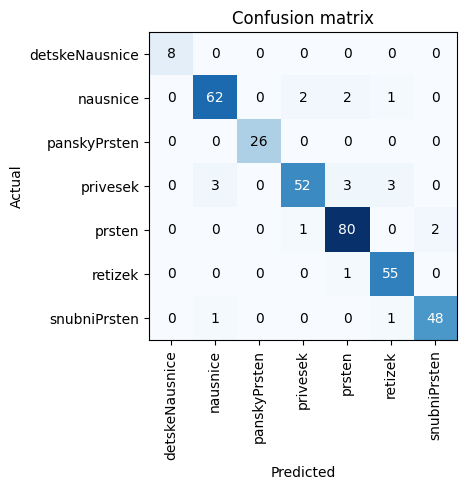

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Zobrazí obrázky s nejvyžší strátou (nesprávně hodnocené)

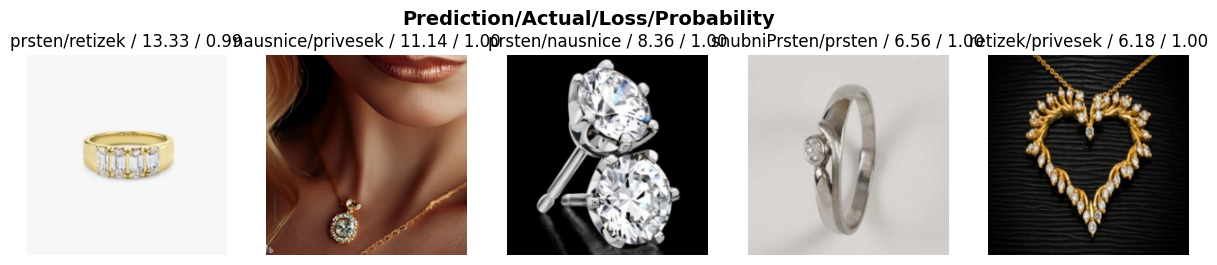

In [ ]:
interp.plot_top_losses(5, nrows=1)

Tento kód používá knihovnu FastAI pro vytvoření databloku pro trénování a predikce, načtení a trénování modelu ResNet-34 na trénovacích datech, uložení a načtení modelu a nakonec procházení a klasifikaci obrázků ve validačních datech. Klasifikované obrázky jsou ukládány do odpovídajících adresářů podle klasifikace.

Roztřídí pomocí natrénovaného modelu vlastní obrázky z adresáře

In [ ]:
from fastai.vision.all import *
from pathlib import Path
import shutil

# Definice cest k adresářům
unclassified_dir = Path("/content/drive/MyDrive/KatalogAA")
classified_dir = Path("/content/drive/MyDrive/Katalog/sperk")
model_dir = Path("/content/drive/MyDrive/Katalog/")

# Mapování mezi interními názvy tříd a požadovanými názvy adresářů
class_mapping = {
    'tensor(0)': 'detskeNausnice',
    'tensor(1)': 'nahrdelnik',
    'tensor(2)': 'nausnice',
    'tensor(3)': 'panskyPrsten',
    'tensor(4)': 'privesek',
    'tensor(5)': 'prsten',
    'tensor(6)': 'retizek',
    'tensor(7)': 'snubniPrsten'
}

# Načtení vytrénovaného modelu
learn_predict = load_learner(model_dir/'model.pkl')

# Funkce pro klasifikaci a kopírování obrázku
def classify_and_copy(image_path, model):
    img = PILImage.create(image_path)
    pred, label, probs = model.predict(img)

    # Získání názvu podadresáře jako řetězce z mapování
    label_str = class_mapping[str(label)]

    # Cílový adresář pro kopii obrázku
    target_dir = classified_dir / label_str

    # Vytvoření cílové cesty pro kopii
    target_path = target_dir / image_path.name

    # Pokud soubor ve stejné cestě již existuje, přeskočit kopírování
    if target_path.exists():
        print(f"Soubor '{image_path.name}' již existuje v cílovém adresáři '{target_dir}'. Přeskočeno.")
        return

    # Zkopírování obrázku do odpovídajícího podadresáře
    #shutil.copy(image_path, target_path)

    print(f"Obrázek '{image_path.name}' klasifikován jako '{label_str}' a zkopírován do '{target_dir}'")

    porovnejVkateg = label_str
    print("Porovnat v kategorii - ", label_str)



# Procházení klasifikovaných obrázků
for label_dir in unclassified_dir.glob("*"):
    if label_dir.is_dir():
        for image_path in get_image_files(label_dir):
            classify_and_copy(image_path, learn_predict)




Obrázek '20_000.jpg' klasifikován jako 'mensRing' a zkopírován do '/content/drive/MyDrive/Katalog/sperk/mensRing'
Porovnat v kategorii -  mensRing


Hledání stejného nebo podobného šperku.

In [ ]:
from fastai.vision.all import *

# Cesta k vašim datům (tréninkovým a validačním)
data_path = Path("/cesta/k/vašim/datům")

# Vytvoření datového zásobníku pro trénink
data = ImageDataLoaders.from_folder(data_path, train=".", valid_pct=0.2,
                                    item_tfms=Resize(224),
                                    batch_tfms=aug_transforms())

# Vytvoření modelu a trénink
learn = cnn_learner(data, resnet34, metrics=error_rate)
learn.fine_tune(10)  # Počet epoch může být jiný, záleží na vašich datech a výkonu

Jednoduchá podobnost na základě predikcí modelu.
Tato metoda neporovnává dva šperky dobře!!!

In [ ]:
from fastai.vision.all import *

model_dir = Path("/content/drive/MyDrive/Katalog")
path = Path('/content/drive/MyDrive/Katalog/sperk')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),     # Druh vstupních dat "obrázek", výstup "kategorie"
    get_items=get_image_files,             # Funkce, která vrací seznam obrázků
    splitter=RandomSplitter(valid_pct=0.2, seed=42),# Vyčlenění ověřovací sady 20% náhodně vybrané
    get_y=parent_label,                             # Třídit podle adresáře - štítek"ring nebo earing"
    item_tfms=[Resize(192, method='squish')]        # Zmenšit na velikost  192 pixel "zmačknutím"
).dataloaders(path, bs=30)                          # Nakladač dat - upravit bs=62 (podle počtu obrázků)

#dls.show_batch(max_n=6)

# Vytvoření a načtení již vytrénovaného modelu
learn = load_learner(model_dir/'model.pkl')

# Prahová hodnota pro podobnost
threshold = 0.98

# Cesta k testovacímu obrázku
test_image_path = Path("/content/drive/MyDrive/Katalog/test_img/obr.jpg")

# Načtení testovacího obrázku
test_img = PILImage.create(test_image_path)

# Klasifikace testovacího obrázku
pred_class, pred_idx, outputs = learn.predict(test_img)

# Zde budete potřebovat nějaký mechanismus pro porovnání a hledání podobných šperků
# Například můžete načíst obrázky z jednotlivých adresářů, provést predikci pro každý
# a následně porovnat výstupy na základě nějaké míry podobnosti.

# Načtení a predikce ze složky s prsteny
ring_path = Path("/content/drive/MyDrive/Katalog/sperk/ring")
ring_images = get_image_files(ring_path)
similar_rings = []

for img_path in ring_images:
    img = PILImage.create(img_path)
    _, _, out = learn.predict(img)
    similarity = out[pred_idx.item()]  # Přístup k hodnotě na pozici pred_idx

    # Porovnání podobnosti
    if similarity >= threshold:
        similar_rings.append((img, similarity))


# Seřazení podobných obrázků podle míry podobnosti
similar_rings.sort(key=lambda x: x[1], reverse=True)

# Zobrazení podobných obrázků
num_similar = min(5, len(similar_rings))  # Zobrazí nejvýše 5 podobných obrázků
fig, axes = plt.subplots(1, num_similar, figsize=(15, 5))

for i in range(num_similar):
    img, similarity = similar_rings[i]
    ax = axes[i]
    img.show(ax=ax, title=f"Similarity: {similarity:.2f}")
    ax.axis('off')

plt.show()




Pro porovnání zlatých prstenů můžete využít techniky zpracování obrazu, jako je výpočet podobnosti nebo vzdálenosti mezi obrazy na základě jejich vizuálních rysů.

Jednou z efektivních metod je výpočet podobnosti pomocí tzv. "Feature Vectors" (vektorů rysů) obrazů, což jsou kompaktní reprezentace obrazu, které zachycují jeho klíčové vizuální charakteristiky. Můžete využít předtrénované modely pro extrakci těchto vektorů a následně použít vhodnou metriku (např. kosínovou podobnost nebo eukleidovskou vzdálenost) pro porovnání.
Tento kód využívá extrakci vektorů rysů ze šperků a následně porovnává jejich kosínovou podobnost s vektorem rysů testovacího obrázku. Výsledkem je seznam podobných obrázků seřazený podle míry podobnosti. Ujistěte se, že máte nainstalovanou knihovnu torch (PyTorch), protože je použita pro extrakci vektorů rysů.
Zde je zjednodušený příklad, jak by takový kód mohl vypadat:

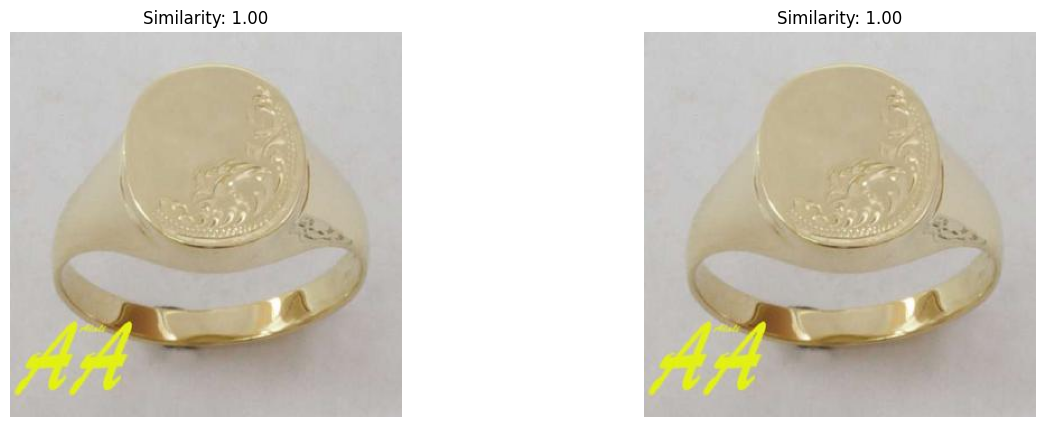

In [ ]:
from fastai.vision.all import *
from scipy.spatial.distance import cosine

model_dir = Path("/content/drive/MyDrive/Katalog")
path = Path('/content/drive/MyDrive/Katalog/sperk')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=30)

# Načtení vytrénovaného modelu
learn = load_learner(model_dir/'model.pkl')

# Prahová hodnota pro podobnost
threshold = 0.95

# Cesta k testovanému obrázku
test_image_path = Path("/content/drive/MyDrive/KatalogAA/Sperky/20_000.jpg")

# Načtení testovacího obrázku
test_img = PILImage.create(test_image_path)

# Funkce pro extrakci vektoru rysů z konkrétní vrstvy modelu
def hook_fn(m, i, o):
    hook_fn.output = o

# Vyberte vrstvu, ze které chcete extrahovat vektor rysů
target_layer = learn.model[0][-2][0]

# Registrování hook funkce na vybrané vrstvě
hook = target_layer.register_forward_hook(hook_fn)

# Klasifikace testovacího obrázku a získání vektoru rysů
with torch.no_grad():
    learn.predict(test_img)

# Extrahovaný vektor rysů
feature_vector = hook_fn.output[0].view(-1)  # Převedení na 1-D pole

# Načtení a porovnání vektorů rysů ze složky s prsteny
ring_path = Path("/content/drive/MyDrive/Katalog/sperk/mensRing")
ring_images = get_image_files(ring_path)
similar_rings = []

for img_path in ring_images:
    img = PILImage.create(img_path)
    with torch.no_grad():
        learn.predict(img)
    ring_feature_vector = hook_fn.output[0].view(-1)  # Převedení na 1-D pole

    # Výpočet kosínové podobnosti mezi vektory
    similarity = 1 - cosine(feature_vector, ring_feature_vector)

    # Porovnání podobnosti
    if similarity >= threshold:
        similar_rings.append((img, similarity))

# Seřazení podobných obrázků podle míry podobnosti
similar_rings.sort(key=lambda x: x[1], reverse=True)

# Zobrazení podobných obrázků
num_similar = min(5, len(similar_rings))
fig, axes = plt.subplots(1, num_similar, figsize=(15, 5))

for i in range(num_similar):
    img, similarity = similar_rings[i]
    ax = axes[i]
    img.show(ax=ax, title=f"Similarity: {similarity:.2f}")
    ax.axis('off')

plt.show()

Název souboru: obr.jpg


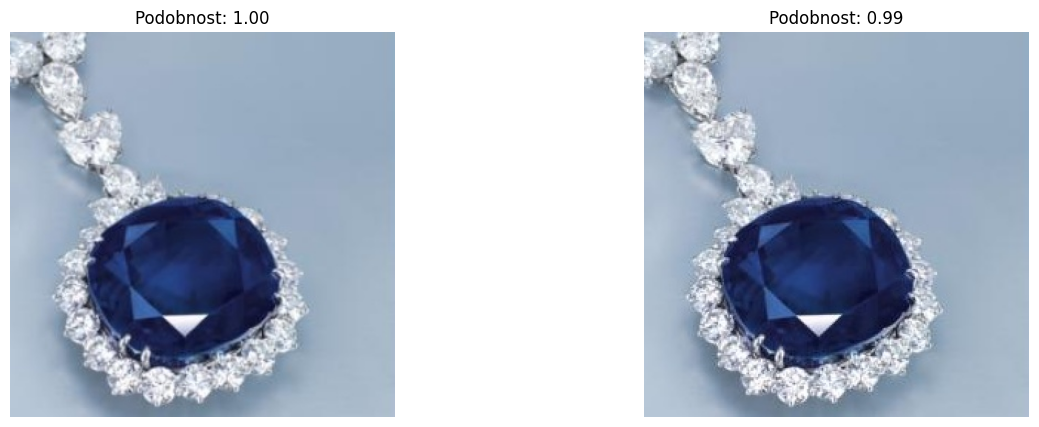

In [ ]:
import matplotlib.pyplot as plt
from fastai.vision.all import *
from scipy.spatial.distance import cosine
from PIL import Image
from pathlib import Path

model_dir = Path("/content/drive/MyDrive/Katalog")
path = Path('/content/drive/MyDrive/Katalog/sperk')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=30)

# Načtení vytrénovaného modelu
learn = load_learner(model_dir/'model.pkl')

# Prahová hodnota pro podobnost
threshold = 0.95

# Příklad cesty k testovacímu obrázku
test_image_path = Path("/content/drive/MyDrive/Katalog/test_img/obr.jpg")

# Vytvoření instance PILImage z testovacího obrázku
test_imgName = Image.open(test_image_path)
# Získání názvu souboru
file_Name = test_image_path.name
# Tisk názvu souboru
print("Název souboru:", file_Name)

# Načtení testovacího obrázku
test_img = PILImage.create(test_image_path)

# Funkce pro extrakci vektoru rysů z konkrétní vrstvy modelu
def hook_fn(m, i, o):
    hook_fn.output = o

# Vyberte vrstvu, ze které chcete extrahovat vektor rysů
target_layer = learn.model[0][-2][0]

# Registrování hook funkce na vybrané vrstvě
hook = target_layer.register_forward_hook(hook_fn)

# Klasifikace testovacího obrázku a získání vektoru rysů
with torch.no_grad():
    learn.predict(test_img)

# Extrahovaný vektor rysů
feature_vector = hook_fn.output[0].view(-1)  # Převedení na 1-D pole

# Načtení a porovnání vektorů rysů ze složky s prsteny
ring_path = Path("/content/drive/MyDrive/Katalog/sperk/pendant")
ring_images = get_image_files(ring_path)
similar_rings = []

for img_path in ring_images:
    img = PILImage.create(img_path)
    with torch.no_grad():
        learn.predict(img)
    ring_feature_vector = hook_fn.output[0].view(-1)  # Převedení na 1-D pole

    # Výpočet kosínové podobnosti mezi vektory
    similarity = 1 - cosine(feature_vector, ring_feature_vector)

    # Porovnání podobnosti
    if similarity >= threshold:
        similar_rings.append((img, similarity))

# Seřazení podobných obrázků podle míry podobnosti
similar_rings.sort(key=lambda x: x[1], reverse=True)

# Zobrazení podobných obrázků
num_similar = min(5, len(similar_rings))
fig, axes = plt.subplots(1, num_similar, figsize=(15, 5))

for i in range(num_similar):
    img, similarity = similar_rings[i]
    ax = axes[i]

    img.show(ax=ax,  title=f"Podobnost: {similarity:.2f}")
    ax.axis('off')

plt.show()


Uprava obrázků pomocí opencv

In [ ]:
!pip install opencv-python

<class 'numpy.ndarray'>


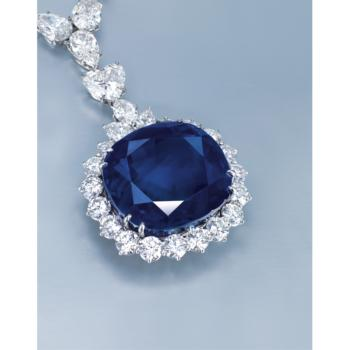

Velikos obrázku je (350, 350, 3)


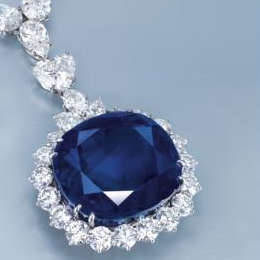

Velikos obrázku je (260, 260, 3)
Velikos obrázku (obr_rs.jpg) je (350, 350, 3)


In [ ]:

from google.colab.patches import cv2_imshow
import cv2

# Načtěte váš obrázek
img = cv2.imread("/content/drive/MyDrive/Katalog/test_img/obr.jpg")

# Zkontrolujte typ čteného obrázku
print(type(img))

# Zobrazte obrázek pomocí cv2_imshow
cv2_imshow(img)

# Zjistí velikost
print("Velikos obrázku je", img.shape)

# [rows, columns]
crop = img[10:270, 50:310]
cv2_imshow(crop)
print("Velikos obrázku je", crop.shape)

#Změna velikosti
new_size = (350, 350) # new_size=(width, height)
resize_img = cv2.resize(crop, new_size)

#Uloží obrázek
cv2.imwrite('/content/drive/MyDrive/Katalog/test_img/obr_rs.jpg', resize_img)
print("Velikos obrázku (obr_rs.jpg) je", resize_img.shape)

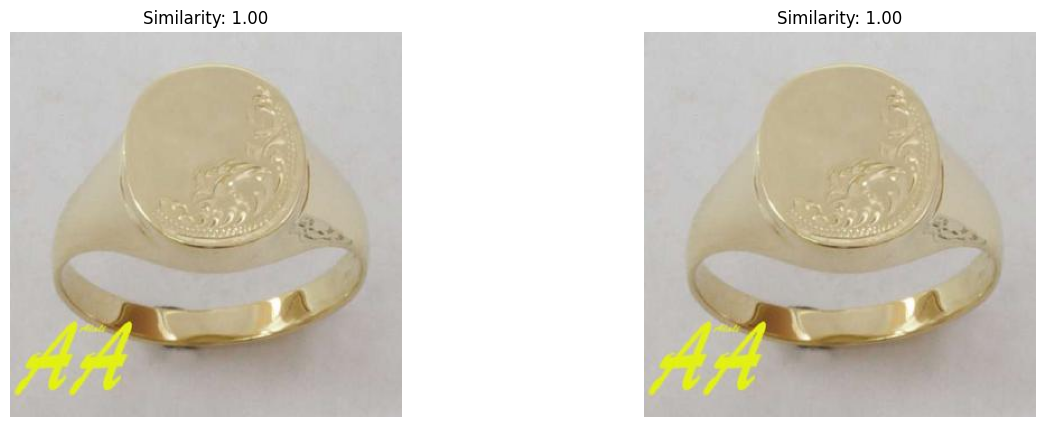

In [ ]:
from fastai.vision.all import *
from scipy.spatial.distance import cosine

class ImageSimilarityClassifier:
    def __init__(self, model_path, test_image_path, similar_images_path, threshold=0.95):
        self.model_path = Path(model_path)
        self.test_image_path = Path(test_image_path)
        self.similar_images_path = Path(similar_images_path)
        self.threshold = threshold

        self.dls = DataBlock(
            blocks=(ImageBlock, CategoryBlock),
            get_items=get_image_files,
            splitter=RandomSplitter(valid_pct=0.2, seed=42),
            get_y=parent_label,
            item_tfms=[Resize(192, method='squish')]
        ).dataloaders(self.similar_images_path, bs=30)

        self.learn = load_learner(self.model_path / 'model.pkl')
        self.target_layer = self.learn.model[0][-2][0]
        self.hook = self.target_layer.register_forward_hook(self.hook_fn)
        self.hook_output = None

    def hook_fn(self, m, i, o):
        self.hook_output = o

    def load_test_image(self):
        return PILImage.create(self.test_image_path)

    def extract_feature_vector(self, img):
        with torch.no_grad():
            self.learn.predict(img)
        return self.hook_output[0].view(-1)

    def calculate_similarity(self, vector1, vector2):
        return 1 - cosine(vector1, vector2)

    def find_similar_images(self):
        feature_vector = self.extract_feature_vector(self.load_test_image())
        similar_images = []

        for img_path in get_image_files(self.similar_images_path):
            img = PILImage.create(img_path)
            ring_feature_vector = self.extract_feature_vector(img)
            similarity = self.calculate_similarity(feature_vector, ring_feature_vector)

            if similarity >= self.threshold:
                similar_images.append((img, similarity))

        similar_images.sort(key=lambda x: x[1], reverse=True)
        return similar_images

    def display_similar_images(self, num_similar=5):
        similar_images = self.find_similar_images()
        num_similar = min(num_similar, len(similar_images))
        fig, axes = plt.subplots(1, num_similar, figsize=(15, 5))

        for i in range(num_similar):
            img, similarity = similar_images[i]
            ax = axes[i]
            img.show(ax=ax, title=f"Similarity: {similarity:.2f}")
            ax.axis('off')

        plt.show()

# Parametry třídy
model_dir = "/content/drive/MyDrive/Katalog"
test_image_path = "/content/drive/MyDrive/KatalogAA/Sperky/20_000.jpg"
similar_images_path = "/content/drive/MyDrive/Katalog/sperk/mensRing"
threshold = 0.95

# Vytvoření instance třídy
image_similarity_classifier = ImageSimilarityClassifier(model_dir, test_image_path, similar_images_path, threshold)

# Zobrazení podobných obrázků
image_similarity_classifier.display_similar_images()



Třída pro porovnání obrázku s obrázky v souboru

In [ ]:
from fastai.vision.all import *
from scipy.spatial.distance import cosine
import os

class ImageSimilarityClassifier:
    def __init__(self, model_path, test_image_path, similar_images_path, threshold=0.95):
        # Inicializace třídy s cestami k modelu, testovacímu obrázku a složce s podobnými obrázky
        self.model_path = Path(model_path)
        self.test_image_path = Path(test_image_path)
        self.similar_images_path = Path(similar_images_path)
        self.threshold = threshold

        # Definice DataLoaderů pro podobné obrázky
        self.dls = DataBlock(
            blocks=(ImageBlock, CategoryBlock),
            get_items=get_image_files,
            splitter=RandomSplitter(valid_pct=0.2, seed=42),
            get_y=parent_label,
            item_tfms=[Resize(192, method='squish')]
        ).dataloaders(self.similar_images_path, bs=30)

        # Načtení modelu pro predikci
        self.learn = load_learner(self.model_path / 'model.pkl')

        # Vybrání konkrétní vrstvy modelu pro extrakci rysů
        self.target_layer = self.learn.model[0][-2][0]

        # Registrování hook funkce na vybrané vrstvě
        self.hook = self.target_layer.register_forward_hook(self.hook_fn)
        self.hook_output = None

    def hook_fn(self, m, i, o):
        # Hook funkce pro extrakci výstupu z vrstvy
        self.hook_output = o

    def load_test_image(self):
        # Načtení testovacího obrázku
        return PILImage.create(self.test_image_path)

    def extract_feature_vector(self, img):
        # Extrakce vektoru rysů z obrázku
        with torch.no_grad():
            self.learn.predict(img)
        return self.hook_output[0].view(-1)

    def calculate_similarity(self, vector1, vector2):
        # Výpočet kosínové podobnosti mezi dvěma vektory
        return 1 - cosine(vector1, vector2)

    def find_similar_images(self):
        # Hledání podobných obrázků
        feature_vector = self.extract_feature_vector(self.load_test_image())
        similar_images = []

        for img_path in get_image_files(self.similar_images_path):
            img = PILImage.create(img_path)
            ring_feature_vector = self.extract_feature_vector(img)
            similarity = self.calculate_similarity(feature_vector, ring_feature_vector)

            if similarity >= self.threshold:
                similar_images.append((img, similarity))

        similar_images.sort(key=lambda x: x[1], reverse=True)
        return similar_images

    def display_similar_images(self, num_similar=5):
        # Zobrazení podobných obrázků s názvy souborů
        similar_images = self.find_similar_images()
        num_similar = min(num_similar, len(similar_images))
        fig, axes = plt.subplots(1, num_similar, figsize=(15, 5))

        for i in range(num_similar):
            img, similarity = similar_images[i]
            ax = axes[i]
            img_path = str(img)  # Převod Path objektu na řetězec
            img_name = os.path.basename(img_path)  # Získání názvu souboru
            img.show(ax=ax, title=f"Name: {img_name}\nSimilarity: {similarity:.2f}")
            ax.axis('off')

        plt.show()

# Parametry třídy
model_dir = "/content/drive/MyDrive/Katalog"
test_image_path = "/content/drive/MyDrive/KatalogAA/Sperky/20_000.jpg"
similar_images_path = "/content/drive/MyDrive/Katalog/sperk/mensRing"
threshold = 0.95

# Vytvoření instance třídy
image_similarity_classifier = ImageSimilarityClassifier(model_dir, test_image_path, similar_images_path, threshold)

# Zobrazení podobných obrázků s názvy souborů
image_similarity_classifier.display_similar_images()

Třída pro identifikaci obr. do které kategorie patří

In [ ]:
from fastai.vision.all import *
from pathlib import Path
import shutil

class ImageClassifier:
    def __init__(self, model_dir, classified_dir, class_mapping):
        self.model_dir = Path(model_dir)
        self.classified_dir = Path(classified_dir)
        self.class_mapping = class_mapping
        self.learn_predict = load_learner(self.model_dir/'model.pkl')

    def classify_and_copy(self, image_path):
        img = PILImage.create(image_path)
        pred, label, probs = self.learn_predict.predict(img)

        label_str = self.class_mapping[str(label)]
        target_dir = self.classified_dir / label_str
        target_path = target_dir / image_path.name

        if target_path.exists():
            print(f"Soubor '{image_path.name}' již existuje v cílovém adresáři '{target_dir}'. Přeskočeno.")
            return

        #shutil.copy(image_path, target_path)

        print(f"Obrázek '{image_path.name}' klasifikován jako '{label_str}' a zkopírován do '{target_dir}'")
        print("Porovnat v kategorii - ", label_str)

    def process_images(self, unclassified_dir):
        for label_dir in unclassified_dir.glob("*"):
            if label_dir.is_dir():
                for image_path in get_image_files(label_dir):
                    self.classify_and_copy(image_path)

# Definice cest k adresářům
unclassified_dir = Path("/content/drive/MyDrive/KatalogAA")
classified_dir = Path("/content/drive/MyDrive/Katalog/sperk")
model_dir = Path("/content/drive/MyDrive/Katalog/")

# Mapování mezi interními názvy tříd a požadovanými názvy adresářů
class_mapping = {
    'tensor(0)': 'earring',
    'tensor(1)': 'chain',
    'tensor(2)': 'childrensEarring',
    'tensor(3)': 'mensRing',
    'tensor(4)': 'necklace',
    'tensor(5)': 'pendant',
    'tensor(6)': 'ring',
    'tensor(7)': 'weddingRing'
}

# Vytvoření instance ImageClassifier a zpracování obrázků
image_classifier = ImageClassifier(model_dir, classified_dir, class_mapping)
image_classifier.process_images(unclassified_dir)


Obrázek '20_000.jpg' klasifikován jako 'mensRing' a zkopírován do '/content/drive/MyDrive/Katalog/sperk/mensRing'
Porovnat v kategorii -  mensRing


Dvě třídy
1. Předpovídá do které kategorie patří testovaný obr.
2. Vyhledá v předpovězené kategorii nejpodobnější obr.

In [ ]:
from fastai.vision.all import *
from pathlib import Path
import shutil
from scipy.spatial.distance import cosine
import os

class ImageClassifier:
    def __init__(self, model_dir, classified_dir, class_mapping):
        self.model_dir = Path(model_dir)
        self.classified_dir = Path(classified_dir)
        self.class_mapping = class_mapping
        self.learn_predict = load_learner(self.model_dir/'model.pkl')

    def classify_and_copy(self, image_path):
        img = PILImage.create(image_path)
        pred, label, probs = self.learn_predict.predict(img)

        label_str = self.class_mapping[str(label)]
        target_dir = self.classified_dir / label_str
        target_path = target_dir / image_path.name

        if target_path.exists():
            print(f"Soubor '{image_path.name}' již existuje v cílovém adresáři '{target_dir}'. Přeskočeno.")
            return

        #shutil.copy(image_path, target_path)

        print(f"Obrázek '{image_path.name}' klasifikován jako '{label_str}' a zkopírován do '{target_dir}'")
        print("Porovnat v kategorii - ", label_str)
        self.spust_porovnej_obr(target_dir)

    def process_images(self, unclassified_dir):
        for label_dir in unclassified_dir.glob("*"):
            if label_dir.is_dir():
                for image_path in get_image_files(label_dir):
                    self.classify_and_copy(image_path)

    def spust_porovnej_obr(self, kategorie):
        # Parametry třídy
        model_dir = "/content/drive/MyDrive/Katalog"
        test_image_path = "/content/drive/MyDrive/KatalogAA/Sperky/20_000.jpg"
        #similar_images_path = "/content/drive/MyDrive/Katalog/sperk/mensRing"
        similar_images_path = kategorie
        threshold = 0.95

        # Vytvoření instance třídy
        image_similarity_classifier = ImageSimilarityClassifier(model_dir, test_image_path, similar_images_path, threshold)

        # Zobrazení podobných obrázků s názvy souborů
        image_similarity_classifier.display_similar_images()


# Definice cest k adresářům
unclassified_dir = Path("/content/drive/MyDrive/KatalogAA")
classified_dir = Path("/content/drive/MyDrive/Katalog/sperk")
model_dir = Path("/content/drive/MyDrive/Katalog/")

# Mapování mezi interními názvy tříd a požadovanými názvy adresářů
class_mapping = {
    'tensor(0)': 'earring',
    'tensor(1)': 'chain',
    'tensor(2)': 'childrensEarring',
    'tensor(3)': 'mensRing',
    'tensor(4)': 'necklace',
    'tensor(5)': 'pendant',
    'tensor(6)': 'ring',
    'tensor(7)': 'weddingRing'
}

# Vytvoření instance ImageClassifier a zpracování obrázků
image_classifier = ImageClassifier(model_dir, classified_dir, class_mapping)
image_classifier.process_images(unclassified_dir)

class ImageSimilarityClassifier:
    def __init__(self, model_path, test_image_path, similar_images_path, threshold=0.95):
        # Inicializace třídy s cestami k modelu, testovacímu obrázku a složce s podobnými obrázky
        self.model_path = Path(model_path)
        self.test_image_path = Path(test_image_path)
        self.similar_images_path = Path(similar_images_path)
        self.threshold = threshold

        # Definice DataLoaderů pro podobné obrázky
        self.dls = DataBlock(
            blocks=(ImageBlock, CategoryBlock),
            get_items=get_image_files,
            splitter=RandomSplitter(valid_pct=0.2, seed=42),
            get_y=parent_label,
            item_tfms=[Resize(192, method='squish')]
        ).dataloaders(self.similar_images_path, bs=30)

        # Načtení modelu pro predikci
        self.learn = load_learner(self.model_path / 'model.pkl')

        # Vybrání konkrétní vrstvy modelu pro extrakci rysů
        self.target_layer = self.learn.model[0][-2][0]

        # Registrování hook funkce na vybrané vrstvě
        self.hook = self.target_layer.register_forward_hook(self.hook_fn)
        self.hook_output = None

    def hook_fn(self, m, i, o):
        # Hook funkce pro extrakci výstupu z vrstvy
        self.hook_output = o

    def load_test_image(self):
        # Načtení testovacího obrázku
        return PILImage.create(self.test_image_path)

    def extract_feature_vector(self, img):
        # Extrakce vektoru rysů z obrázku
        with torch.no_grad():
            self.learn.predict(img)
        return self.hook_output[0].view(-1)

    def calculate_similarity(self, vector1, vector2):
        # Výpočet kosínové podobnosti mezi dvěma vektory
        return 1 - cosine(vector1, vector2)

    def find_similar_images(self):
        # Hledání podobných obrázků
        feature_vector = self.extract_feature_vector(self.load_test_image())
        similar_images = []

        for img_path in get_image_files(self.similar_images_path):
            img = PILImage.create(img_path)
            ring_feature_vector = self.extract_feature_vector(img)
            similarity = self.calculate_similarity(feature_vector, ring_feature_vector)

            if similarity >= self.threshold:
                similar_images.append((img, similarity))

        similar_images.sort(key=lambda x: x[1], reverse=True)
        return similar_images

    def display_similar_images(self, num_similar=5):
        # Zobrazení podobných obrázků s názvy souborů
        similar_images = self.find_similar_images()
        num_similar = min(num_similar, len(similar_images))
        fig, axes = plt.subplots(1, num_similar, figsize=(15, 5))

        for i in range(num_similar):
            img, similarity = similar_images[i]
            ax = axes[i]
            img_path = str(img)  # Převod Path objektu na řetězec
            img_name = os.path.basename(img_path)  # Získání názvu souboru
            img.show(ax=ax, title=f"Name: {img_name}\nSimilarity: {similarity:.2f}")
            ax.axis('off')

        plt.show()